In [2]:
import keras
import matplotlib.pyplot as plt
import numpy as np

from keras.models import Model
from keras.datasets import mnist
from keras.layers import Input, Dense
from PIL import Image

Using TensorFlow backend.


In [4]:
# Загрузка данных
(x_train, _), (x_test, _) = mnist.load_data()

image_size = x_train.shape[1]

x_train = x_train.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.astype('float32') / 255.
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Добавление шума
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [8]:
# Создание моделей энкодера, декодера и автоэнкодера
encoding_dim = 1000

input_img = Input(shape=(784,))

encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))


In [9]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [10]:
# Обучение автоэнкодера
autoencoder.fit(x_train_noisy, x_train,
  epochs=100,
  batch_size=256,
  shuffle=True,
  validation_data=(x_test_noisy, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 15s 246us/step - loss: 0.2932 - val_loss: 0.2556
Epoch 2/100
60000/60000 [==============================] - 14s 235us/step - loss: 0.2454 - val_loss: 0.2322
Epoch 3/100
60000/60000 [==============================] - 14s 231us/step - loss: 0.2218 - val_loss: 0.2097
Epoch 4/100
60000/60000 [==============================] - 14s 235us/step - loss: 0.2027 - val_loss: 0.1935
Epoch 5/100
60000/60000 [==============================] - 14s 238us/step - loss: 0.1889 - val_loss: 0.1819
Epoch 6/100
60000/60000 [==============================] - 14s 228us/step - loss: 0.1788 - val_loss: 0.1731
Epoch 7/100
60000/60000 [==============================] - 14s 227us/step - loss: 0.1710 - val_loss: 0.1662
Epoch 8/100
60000/60000 [==============================] - 14s 227us/step - loss: 0.1646 - val_loss: 0.1604
Epoch 9/100
60000/60000 [==============================] - 14s 226us/step - loss: 0.15

60000/60000 [==============================] - 14s 227us/step - loss: 0.1116 - val_loss: 0.1116
Epoch 76/100
60000/60000 [==============================] - 14s 228us/step - loss: 0.1115 - val_loss: 0.1116
Epoch 77/100
60000/60000 [==============================] - 14s 236us/step - loss: 0.1114 - val_loss: 0.1114
Epoch 78/100
60000/60000 [==============================] - 15s 244us/step - loss: 0.1113 - val_loss: 0.1113
Epoch 79/100
60000/60000 [==============================] - 14s 239us/step - loss: 0.1112 - val_loss: 0.1113
Epoch 80/100
60000/60000 [==============================] - 14s 234us/step - loss: 0.1111 - val_loss: 0.1112
Epoch 81/100
60000/60000 [==============================] - 14s 238us/step - loss: 0.1110 - val_loss: 0.1111
Epoch 82/100
60000/60000 [==============================] - 14s 236us/step - loss: 0.1109 - val_loss: 0.1110
Epoch 83/100
60000/60000 [==============================] - 14s 238us/step - loss: 0.1108 - val_loss: 0.1109
Epoch 84/100
60000/60000 [======

In [11]:
# Кодирование и декодирование изображений
encoded_imgs = encoder.predict(x_test_noisy)
decoded_imgs = decoder.predict(encoded_imgs)

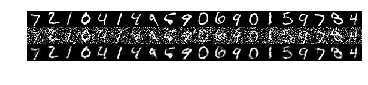

In [12]:
# Отрисовка изображений
rows, cols = 1, 20
num = rows * cols
imgs = np.concatenate([x_test[:num], x_test_noisy[:num], decoded_imgs[:num]])
imgs = imgs.reshape((rows * 3, cols, image_size, image_size))
imgs = np.vstack(np.split(imgs, rows, axis=1))
imgs = imgs.reshape((rows * 3, -1, image_size, image_size))
imgs = np.vstack([np.hstack(i) for i in imgs])
imgs = (imgs * 255).astype(np.uint8)
plt.axis('off')
plt.imshow(imgs, interpolation='none', cmap='gray')
Image.fromarray(imgs).save('sresult.png')
plt.show()